In [97]:
#loading all libraies needed for the project

import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Embedding, Dense, TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [71]:
#importing dataset

df = pd.read_csv("train.csv.zip")

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [72]:
#dropping [id] column, because it is not needed

#df.drop(columns= ["id"], inplace= True)

#df.head()

In [73]:
X = df["comment_text"]
y = df[df.columns[2:]].values


In [74]:
features = 200000
vectorizer = TextVectorization(max_tokens= features, output_sequence_length= 1800, output_mode= "int")
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [75]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) 

In [76]:
#batch_X, batch_y =  dataset.as_numpy_iterator().next()

In [77]:
#batch_y.shape

In [78]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [79]:
train_generator = train.as_numpy_iterator()


In [80]:
train_generator.next()

(array([[86091,     8,   134, ...,     0,     0,     0],
        [ 5252,  7467,   999, ...,     0,     0,     0],
        [ 9497,     7,  9497, ...,     0,     0,     0],
        ...,
        [  983,   655,   179, ...,     0,     0,     0],
        [   18,     8,    33, ...,     0,     0,     0],
        [    8,    19,   282, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [81]:
model = Sequential()
model.add(Embedding(features+1, 32))
model.add(Bidirectional(LSTM(32, activation="tanh")))
model.add(Dense(128, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(6, activation = "sigmoid"))

In [82]:
model.compile(optimizer= "Adam",
              loss=tf.keras.losses.BinaryCrossentropy())
              

In [83]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = model.fit(train, epochs=1, validation_data=val, verbose=1)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2658s 380ms/step - loss: 0.0822 - val_loss: 0.0489


In [85]:
from matplotlib import pyplot as plt

In [86]:
history.history

{'loss': [0.06181088835000992], 'val_loss': [0.04885915294289589]}

<Figure size 800x500 with 0 Axes>

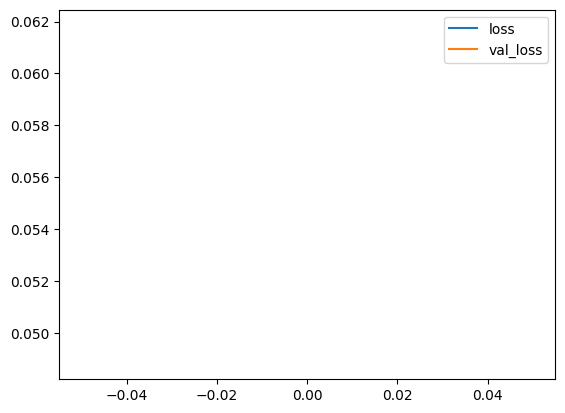

In [87]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [88]:
input_text = vectorizer("you freaking suck!")

In [90]:
res = model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [93]:
(res > 0.5).astype(int)

array([[1, 1, 1, 0, 1, 0]])

In [95]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [96]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])